## ***Importing and instaling requirements***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
##importing libraries
import pandas as pd
import numpy as np


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import time

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import neural_network 
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
#importing Machine larning libraries
from sklearn import preprocessing
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


import warnings
warnings.filterwarnings('ignore')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## **PROBLEM STATEMENT(tier 2)**
Employee attrition is a significant issue for companies, resulting in substantial costs for hiring, retraining, productivity, and work loss for each employee who leaves. To address this, a model needs to be built to predict whether an employee is likely to quit in the near future.

# Reading the data sets & knowing about each attribute.

In [ ]:
##reading train_data 
#Reading train_data 
train_attrition = pd.read_csv("/content/drive/My Drive/train_attrition.csv")
train_work = pd.read_csv("/content/drive/My Drive/train_work.csv")


In [ ]:
#Reading the employee_data
emp_data = pd.read_csv("/content/drive/My Drive/employee_data.csv")

In [ ]:
#Reading the test data 
test_attrition = pd.read_csv("/content/drive/My Drive/test_attrition.csv")
test_work = pd.read_csv("/content/drive/My Drive/test_work.csv")

##viewing train_work


In [ ]:
train_work.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-1,184.0,144.0,40.0,144.0,3,77
1,emp-1,176.0,136.0,40.0,136.0,2,98
2,emp-1,200.0,120.0,72.0,120.0,1,14
3,emp-1,160.0,144.0,8.0,144.0,3,147
4,emp-1,171.0,135.0,0.0,135.0,1,42


## viewing of all datasets



In [ ]:
##viewing train attrition
train_attrition.head()

,EmployeeID,Left_Company
0,emp-1,0
1,emp-10,1
2,emp-100,0
3,emp-101,0
4,emp-102,0


In [ ]:
# viewing  emp_data
emp_data.head()

,EmployeeID,Job_History,Joining_Date,Designation,Sex
0,emp-10,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0
1,emp-108,"Worked at Company - 205 , Company - 373 , Comp...",2012_01,VP,1
2,emp-115,"Worked at Company - 690 , Company - 280 , Comp...",2012_02,Senior,1
3,emp-121,"Worked at Company - 684 , Company - 159 , Comp...",2012_03,VP,1
4,emp-138,"Worked at Company - 443 , Company - 121 , Comp...",2012_05,Senior,1


In [ ]:
##dimensions 

print("The train_attrition has {} rows & {} columns." .format(train_attrition.shape[0], train_attrition.shape[1]))
print("The train_work has {} rows & {} columns." .format(train_work.shape[0], train_work.shape[1]))


The train_attrition has 245 rows & 2 columns.
The train_work has 3983 rows & 7 columns.


In [ ]:
print("The employee data has {} rows & {} columns." .format(emp_data.shape[0], emp_data.shape[1]))

The employee data has 296 rows & 5 columns.


In [ ]:
train_work.head() 

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-1,184.0,144.0,40.0,144.0,3,77
1,emp-1,176.0,136.0,40.0,136.0,2,98
2,emp-1,200.0,120.0,72.0,120.0,1,14
3,emp-1,160.0,144.0,8.0,144.0,3,147
4,emp-1,171.0,135.0,0.0,135.0,1,42


In [ ]:
train_work.isnull().sum()

EmployeeID           0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
dtype: int64

In [ ]:
train_work.skew()

TotalWorkingHours   -0.260006
Billable_Hours      -0.511192
Hours_off_Duty       2.264257
Touring_Hours        0.711346
NoOfProjects         1.724508
ActualTimeSpent      1.343743
dtype: float64

In [ ]:

train_attrition.head() 

,EmployeeID,Left_Company
0,emp-1,0
1,emp-10,1
2,emp-100,0
3,emp-101,0
4,emp-102,0


In [ ]:
train_emp_data = pd.merge(train_attrition, emp_data, how='left', on='EmployeeID')

In [ ]:
train_emp_data.shape

(245, 6)

In [ ]:
train_emp_data.head()

,EmployeeID,Left_Company,Job_History,Joining_Date,Designation,Sex
0,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1
1,emp-10,1,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0
2,emp-100,0,"Worked at Company - 562 , Company - 319",2011_12,Senior,1
3,emp-101,0,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1
4,emp-102,0,Worked at Company - 234,2011_12,Senior,1


In [ ]:
train_final = pd.merge(train_emp_data, train_work, on='EmployeeID', how='left')

In [ ]:
train_final.shape

(3983, 12)

In [ ]:


print("The train_attrition has {} rows & {} columns." .format(train_attrition.shape[0], train_attrition.shape[1]))
print("The train_work has {} rows & {} columns." .format(train_work.shape[0], train_work.shape[1]))


The train_attrition has 245 rows & 2 columns.
The train_work has 3983 rows & 7 columns.


In [ ]:

train = train_final.groupby('EmployeeID').agg('max')
train

,Left_Company,Job_History,Joining_Date,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
EmployeeID,,,,,,,,,,,
emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,205.0,189.0,72.0,189.0,3,231
emp-10,1,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0,241.0,233.0,120.0,186.0,2,147
emp-100,0,"Worked at Company - 562 , Company - 319",2011_12,Senior,1,278.0,264.0,40.0,264.0,3,308
emp-101,0,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1,345.5,233.5,64.0,0.0,2,217
emp-102,0,Worked at Company - 234,2011_12,Senior,1,270.0,249.0,88.0,213.0,2,231
...,...,...,...,...,...,...,...,...,...,...,...
emp-94,0,"Worked at Company - 71 , Company - 324 , Compa...",2011_09,Senior,0,246.0,198.0,80.0,198.0,2,105
emp-96,0,"Worked at Company - 27 , Company - 159",2011_10,Senior,1,254.5,246.5,88.0,239.0,3,238
emp-97,1,"Worked at Company - 789 , Company - 785 , Comp...",2011_10,Junior,0,200.0,176.0,96.0,176.0,2,126


In [ ]:
train.isnull().sum()

Left_Company         0
Job_History          0
Joining_Date         0
Designation          0
Sex                  0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
dtype: int64

In [ ]:
train_final.head()

,EmployeeID,Left_Company,Job_History,Joining_Date,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,184.0,144.0,40.0,144.0,3,77
1,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,176.0,136.0,40.0,136.0,2,98
2,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,200.0,120.0,72.0,120.0,1,14
3,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,160.0,144.0,8.0,144.0,3,147
4,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,171.0,135.0,0.0,135.0,1,42


In [ ]:

emp_data.head()

,EmployeeID,Job_History,Joining_Date,Designation,Sex
0,emp-10,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0
1,emp-108,"Worked at Company - 205 , Company - 373 , Comp...",2012_01,VP,1
2,emp-115,"Worked at Company - 690 , Company - 280 , Comp...",2012_02,Senior,1
3,emp-121,"Worked at Company - 684 , Company - 159 , Comp...",2012_03,VP,1
4,emp-138,"Worked at Company - 443 , Company - 121 , Comp...",2012_05,Senior,1


In [ ]:
print("The employee data has {} rows & {} columns." .format(emp_data.shape[0], emp_data.shape[1]))

The employee data has 296 rows & 5 columns.


In [ ]:
test_attrition.head()

,EmployeeID,Left_Company
0,emp-106,NaN
1,emp-112,NaN
2,emp-114,NaN
3,emp-118,NaN
4,emp-12,NaN


## Merging the datasets based on the employee data.


## Merging the train data into a single datafrfame


In [ ]:
train_emp_data = pd.merge(train_attrition, emp_data, how='left', on='EmployeeID')

In [ ]:
train_emp_data.shape

(245, 6)

In [ ]:
train_final = pd.merge(train_emp_data, train_work, on='EmployeeID', how='left')

In [ ]:
print(train_final.shape)
train_final.head()

(3983, 12)


,EmployeeID,Left_Company,Job_History,Joining_Date,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,184.0,144.0,40.0,144.0,3,77
1,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,176.0,136.0,40.0,136.0,2,98
2,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,200.0,120.0,72.0,120.0,1,14
3,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,160.0,144.0,8.0,144.0,3,147
4,emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,171.0,135.0,0.0,135.0,1,42


In [ ]:

train = train_final.groupby('EmployeeID').agg('max')

In [ ]:
train.head()

,Left_Company,Job_History,Joining_Date,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
EmployeeID,,,,,,,,,,,
emp-1,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,205.0,189.0,72.0,189.0,3,231
emp-10,1,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0,241.0,233.0,120.0,186.0,2,147
emp-100,0,"Worked at Company - 562 , Company - 319",2011_12,Senior,1,278.0,264.0,40.0,264.0,3,308
emp-101,0,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1,345.5,233.5,64.0,0.0,2,217
emp-102,0,Worked at Company - 234,2011_12,Senior,1,270.0,249.0,88.0,213.0,2,231


## Merging the test data into Single data frame. 


In [ ]:


test_emp_data = pd.merge(test_attrition, emp_data, how='left', on='EmployeeID')


In [ ]:
test_emp_data.head()

,EmployeeID,Left_Company,Job_History,Joining_Date,Designation,Sex
0,emp-106,NaN,"Worked at Company - 510 , Company - 658 , Comp...",2012_01,Senior,0
1,emp-112,NaN,"Worked at Company - 42 , Company - 432 , Compa...",2012_02,VP,1
2,emp-114,NaN,"Worked at Company - 99 , Company - 88 , Compan...",2012_02,EVP,1
3,emp-118,NaN,"Worked at Company - 554 , Company - 304",2012_04,EVP,1
4,emp-12,NaN,"Worked at Company - 548 , Company - 405",2006_09,VP,1


In [ ]:
test_final = pd.merge(test_emp_data,test_work, how='left', on='EmployeeID')

In [ ]:
test_final.head()


,EmployeeID,Left_Company,Job_History,Joining_Date,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-106,NaN,"Worked at Company - 510 , Company - 658 , Comp...",2012_01,Senior,0,96.0,16.0,40.0,2.0,2,42
1,emp-106,NaN,"Worked at Company - 510 , Company - 658 , Comp...",2012_01,Senior,0,80.0,0.0,8.0,0.0,0,0
2,emp-106,NaN,"Worked at Company - 510 , Company - 658 , Comp...",2012_01,Senior,0,200.0,16.0,0.0,0.0,1,0
3,emp-106,NaN,"Worked at Company - 510 , Company - 658 , Comp...",2012_01,Senior,0,165.0,114.0,40.0,0.0,1,28
4,emp-106,NaN,"Worked at Company - 510 , Company - 658 , Comp...",2012_01,Senior,0,251.0,219.0,8.0,0.0,1,63


In [ ]:

test = test_final.groupby(by='EmployeeID').agg('max')

In [ ]:
test.shape

(51, 11)

In [ ]:

train.to_csv("train.csv", index=True)
test.to_csv("test.csv", index=True)

## Feature engineering:

In [ ]:
train_final = pd.read_csv("/content/train.csv")
test_final = pd.read_csv("/content/test.csv")

In [ ]:

print((train_final.columns))

Index(['EmployeeID', 'Left_Company', 'Job_History', 'Joining_Date',
       'Designation', 'Sex', 'TotalWorkingHours', 'Billable_Hours',
       'Hours_off_Duty', 'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent'],
      dtype='object')


In [ ]:
print(test_final.columns)

Index(['EmployeeID', 'Left_Company', 'Job_History', 'Joining_Date',
       'Designation', 'Sex', 'TotalWorkingHours', 'Billable_Hours',
       'Hours_off_Duty', 'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent'],
      dtype='object')


In [ ]:
#Dropping
train_final.drop(columns=['EmployeeID'], axis=1,inplace=True)
test_final.drop(columns=['EmployeeID','Left_Company'], axis=1, inplace=True)

In [ ]:
print("Train data shape : {} " .format(train_final.shape))
print("Test data shape: {} ".format(test_final.shape))

Train data shape : (245, 11) 
Test data shape: (51, 10) 


In [ ]:
train_final.head()

,Left_Company,Job_History,Joining_Date,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,205.0,189.0,72.0,189.0,3,231
1,1,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0,241.0,233.0,120.0,186.0,2,147
2,0,"Worked at Company - 562 , Company - 319",2011_12,Senior,1,278.0,264.0,40.0,264.0,3,308
3,0,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1,345.5,233.5,64.0,0.0,2,217
4,0,Worked at Company - 234,2011_12,Senior,1,270.0,249.0,88.0,213.0,2,231


In [ ]:
# Splitting the Joini_date column into Joini year & Joiing month.

train_final[['joining_year','joining_month']] = train_final['Joining_Date'].str.split("_", expand=True)


test_final[['joining_year','joining_month']] = test_final['Joining_Date'].str.split("_", expand=True)

In [ ]:
#checking
train_final.head()

,Left_Company,Job_History,Joining_Date,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,joining_year,joining_month
0,0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,205.0,189.0,72.0,189.0,3,231,2011,01
1,1,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0,241.0,233.0,120.0,186.0,2,147,2006,02
2,0,"Worked at Company - 562 , Company - 319",2011_12,Senior,1,278.0,264.0,40.0,264.0,3,308,2011,12
3,0,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1,345.5,233.5,64.0,0.0,2,217,2012,01
4,0,Worked at Company - 234,2011_12,Senior,1,270.0,249.0,88.0,213.0,2,231,2011,12


In [ ]:
test_final.skew()

Joining_Date        -1.481037
Sex                 -1.944746
TotalWorkingHours    0.298138
Billable_Hours       0.081219
Hours_off_Duty       1.074766
Touring_Hours       -0.528524
NoOfProjects         2.618282
ActualTimeSpent      0.562218
joining_year        -1.475272
joining_month        0.280887
dtype: float64

In [ ]:
train_final['job_count'] = train_final['Job_History'].str.split(',').str.len()

test_final['job_count'] = test_final['Job_History'].str.split(',').str.len()

In [ ]:
#drop

train_final.drop(columns=['Joining_Date'], axis=1, inplace=True)


test_final.drop(columns=['Joining_Date'], axis=1, inplace=True)

In [ ]:
train_final.head()

,Left_Company,Job_History,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,joining_year,joining_month,job_count
0,0,"Worked at Company - 639 , Company - 212 , Comp...",MD,1,205.0,189.0,72.0,189.0,3,231,2011,01,3
1,1,"Worked at Company - 816 , Company - 724 , Comp...",VP,0,241.0,233.0,120.0,186.0,2,147,2006,02,4
2,0,"Worked at Company - 562 , Company - 319",Senior,1,278.0,264.0,40.0,264.0,3,308,2011,12,2
3,0,"Worked at Company - 212 , Company - 668 , Comp...",Senior,1,345.5,233.5,64.0,0.0,2,217,2012,01,3
4,0,Worked at Company - 234,Senior,1,270.0,249.0,88.0,213.0,2,231,2011,12,1


In [ ]:
train_final.dtypes #check


Left_Company           int64
Job_History           object
Designation           object
Sex                    int64
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
joining_year          object
joining_month         object
job_count              int64
dtype: object

In [ ]:
test_final.dtypes #check 

Job_History           object
Designation           object
Sex                    int64
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
joining_year          object
joining_month         object
job_count              int64
dtype: object

In [ ]:

train_copy = train_final.copy()
test_copy = test_final.copy()

In [ ]:


for col in ['TotalWorkingHours','Billable_Hours','Hours_off_Duty','Touring_Hours']:
  train_final[col] = train_final[col].astype('float')

In [ ]:

for col in ['TotalWorkingHours','Billable_Hours','Hours_off_Duty','Touring_Hours']:
  test_final[col] = test_final[col].astype('float')

### Converting objects to categories 

In [ ]:


for col in ['Sex','Designation','NoOfProjects','joining_year','joining_month','Job_History']:
  train_final[col] = train_final[col].astype('category')
#on testing data 

for col in ['Sex','Designation','NoOfProjects','joining_year','joining_month','Job_History']:
  test_final[col] = test_final[col].astype('category')

train_final['Left_Company'] = train_final['Left_Company'].astype('category')

In [ ]:


cat_attr = list(train_final.select_dtypes("category").columns) #exclude target column inthe list
num_attr = list(test_final.columns.difference(cat_attr))

# cat_attr.pop()

In [ ]:
cat_attr.remove('Left_Company')

In [ ]:
cat_attr

['Job_History',
 'Designation',
 'Sex',
 'NoOfProjects',
 'joining_year',
 'joining_month']

In [ ]:
num_attr

['ActualTimeSpent',
 'Billable_Hours',
 'Hours_off_Duty',
 'TotalWorkingHours',
 'Touring_Hours',
 'job_count']

In [ ]:
 ! pip install  scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Columns with missing values

In [ ]:

missing_cols_train = train_final.columns[train_final.isnull().any()]
print(missing_cols_train)

missing_cols_test = test_final.columns[test_final.isnull().any()]
print(missing_cols_test)

Index([], dtype='object')
Index([], dtype='object')


In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()
from IPython.display import HTML
from timeit import default_timer as timer
from sklearnex import patch_sklearn
# The names match scikit-learn estimators
patch_sklearn("SVC")
from sklearnex import patch_sklearn
# The names match scikit-learn estimators
patch_sklearn(["SVC", "DBSCAN","Kmeans"])
from sklearn.ensemble import StackingRegressor
import optuna 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
def objective(trial):
    params ={
        'C': trial.suggest_float('C', 0.000000001, 1.0),
        'random_state': 0,
        'n_jobs': -1,
    }
    model = LogisticRegression(**params).fit(x_train, y_train)
    y_pred = model.predict_proba(x_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    score = auc(fpr, tpr)
    return score

In [ ]:
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=123),
                            direction="maximize",
                            pruner=optuna.pruners.HyperbandPruner())



[I 2023-05-22 18:10:49,500] A new study created in memory with name: no-name-c64898bc-cded-45b7-b560-2d776a4a95e9


## Dummification

In [ ]:
y= train_final['Left_Company']

del train_final['Left_Company']
X = train_final

In [ ]:

#One hot encoding  train

dummy_train = pd.get_dummies(data= X, columns= cat_attr, drop_first=True)

In [ ]:
dummy_train.shape

(245, 283)

In [ ]:
#One hot encoding in test

test_final = pd.get_dummies(data= test_final, columns= cat_attr, drop_first=True)

In [ ]:
print(test_final.shape)

(51, 86)


In [ ]:
# Aligninng 

dummy_train, test_final = dummy_train.align(test_final, join='left', axis=1)

In [ ]:
#checking for missing valurd;
print(test_final.isnull().sum().sum())

test_final.fillna(value=0, inplace=True)

12597


In [ ]:
#standardize 

std = StandardScaler() #Instantiating an object. 
std.fit(dummy_train) #Fittin gon th train data

std_x = std.transform(dummy_train) 
std_test = std.transform(test_final)

In [ ]:
print(std_x.shape)
print(std_test.shape)

(245, 283)
(51, 283)


In [ ]:
#### now predicting the model ny logisticc regression , desion treee  on 6 - yet to complete level 1

# Models On complete std data without splitting : 

 

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(std_x, y)


LogisticRegression()

In [ ]:
log_pred = log_reg.predict(std_x)

print(f1_score(y, log_pred))
print(recall_score(y, log_pred))
print(precision_score(y, log_pred))


1.0
1.0
1.0


##  Model-2  Decision tree :

In [ ]:
%%time
clf_dt =  DecisionTreeClassifier()

dt_param_grid = {'criterion': ['entropy', 'gini'], 
                 'max_depth': [3,4,5],
                 "min_samples_split": [2,5],
                 "min_samples_leaf": [1,3,5]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, n_jobs=-1, cv=10,return_train_score=True)

dt_grid.fit(std_x,y)

print(dt_grid.best_params_)

dt_pred = dt_grid.predict(std_x)



print(f1_score(y, dt_pred))
print("recall score "+str(recall_score(dt_pred,y)))
print("precision score"+str(precision_score(dt_pred,y)))

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.851063829787234
recall score 1.0
precision score0.7407407407407407
CPU times: user 330 ms, sys: 58.8 ms, total: 389 ms
Wall time: 2.74 s


## Model-3 --Build Gradient Boosting 

In [ ]:

%%time
clf_gbc = GradientBoostingClassifier()

gbm_param_grid = {'max_depth': [2,3,4],
                  'subsample': [0.8,0.6],
                  'max_features':[0.3], 
                  'n_estimators': [10, 20, 30],
                  'learning_rate':[0.1]}

gbm_grid = GridSearchCV(clf_gbc, param_grid=gbm_param_grid, n_jobs =-1, cv=5)

gbm_grid.fit(std_x,y)

print("The Best parameters are: {} .".format(gbm_grid.best_params_))

train_pred_gb = gbm_grid.predict(std_x)

print("f1 score="+str(f1_score(y, train_pred_gb)))
print("recall score= "+str(recall_score(train_pred_gb,y)))
print("precision score="+str(precision_score(train_pred_gb,y)))



The Best parameters are: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 0.3, 'n_estimators': 20, 'subsample': 0.8} .
f1 score=0.851063829787234
recall score= 1.0
precision score=0.7407407407407407
CPU times: user 170 ms, sys: 14.2 ms, total: 184 ms
Wall time: 1.73 s


After smote analysis

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Building model after outholding the dataset.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.3, random_state=11, stratify=y)


In [ ]:
sm = SMOTE(random_state=2)

x_train_re, y_train_re = sm.fit_resample(x_train, y_train.ravel())
x_test_re, y_test_re = sm.fit_resample(x_test,y_test.ravel())


## Model-1 Gradient Boosting : 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.3, random_state=11, stratify=y)


## Model-2  Logit Model :  


In [ ]:
log_reg_2 = LogisticRegression()

log_reg_2.fit(x_train_re,y_train_re)

log_reg_pred_train = log_reg_2.predict(x_train_re)
log_reg_pred_test = log_reg_2.predict(x_test_re)

print(f1_score(y_train_re, log_reg_pred_train))
print(f1_score(y_test_re, log_reg_pred_test))
print("recall score= "+str(recall_score(log_reg_pred_test,y_test_re)))
print("precision score="+str(precision_score(log_reg_pred_test,y_test_re)))
# print("precision for train"+str(precision_score(y_train_re, log_reg_pred_train)))
# print("recall for train"+str(recall_score(y_train_re, log_reg_pred_train)))

#prediction on test data 



1.0
0.0
recall score= 0.0
precision score=0.0


## Model-3 xgBoost : 

In [ ]:

%%time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearnex import patch_sklearn
patch_sklearn()
xgb = xgb.XGBClassifier()


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"n_estimators" : [10,15],
              "max_depth" : [3,5,6,7],
              "colsample_bytree":[0.7,.8],
              "learning_rate": [0.001,0.01,0.1],
              "subsample":[0.8,0.6]}

xg_grid = GridSearchCV(xgb, param_grid=param_grid, n_jobs=-1, cv=kfold)


xg_grid.fit(x_train_re,y_train_re)

print(xg_grid.best_params_)

train_pred = xg_grid.predict(x_train_re)
test_pred = xg_grid.predict(x_test_re)
print("precision score",str(precision_score(y_train_re, train_pred)))
print("recall score"+str(recall_score(y_train_re, train_pred)))

print("Train Score: {}." .format(f1_score(y_train_re, train_pred)))
print("Validation Score: {}." .format(f1_score(y_test_re, test_pred)))


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 15, 'subsample': 0.8}
precision score 1.0
recall score0.9868421052631579
Train Score: 0.9933774834437086.
Validation Score: 0.9606299212598425.
CPU times: user 862 ms, sys: 49.5 ms, total: 912 ms
Wall time: 11.6 s


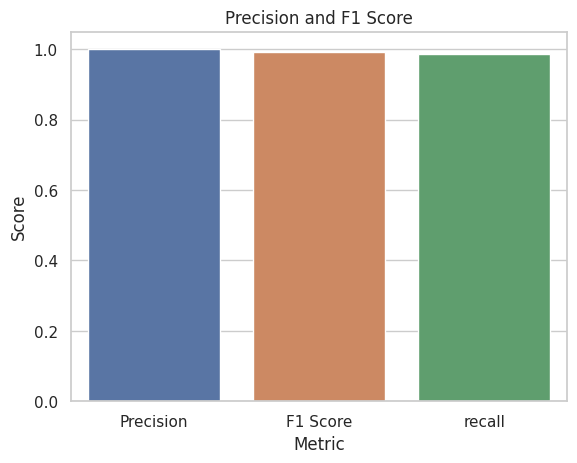

In [ ]:
##model-3 xgboost 
import seaborn as sns



sns.set_theme(style="whitegrid")


precision = precision_score(y_train_re, train_pred)
f1 = f1_score(y_train_re, train_pred)
recall =recall_score(y_train_re, train_pred)


data = {'Metric': ['Precision', 'F1 Score','recall'],
        'Score': [precision, f1,recall]}
df_scores = pd.DataFrame(data)


sns.barplot(x='Metric', y='Score', data=df_scores)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Precision and F1 Score')
plt.show()


In [ ]:
## Model- 4 RF

**MODEL 4 RANDOM FOREST:**

In [ ]:
%%time
clf_rf = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"n_estimators" : [3,4,5,10,12,13,14],
              "max_depth" : [2,3,5,6],
              "max_features" : [3,4, 5, 7],
              "min_samples_leaf" : [4, 6, 8, 10]}

rf_grid = GridSearchCV(clf_rf, param_grid=dt_param_grid, cv=kfold)


rf_grid.fit(x_train_re,y_train_re)

print(rf_grid.best_params_)

train_pred_rf = rf_grid.predict(x_train_re)
test_pred_rf = rf_grid.predict(x_test_re)
print("precision score",str(precision_score(y_test_re, test_pred_rf)))
print("Train Score: {} ." .format(f1_score(y_train_re, train_pred_rf)))
print("Validation Score: {} ." .format(f1_score(y_test_re, test_pred_rf)))



{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
precision score 1.0
Train Score: 0.9966996699669968 .
Validation Score: 0.9606299212598425 .
CPU times: user 28.4 s, sys: 109 ms, total: 28.5 s
Wall time: 28.7 s


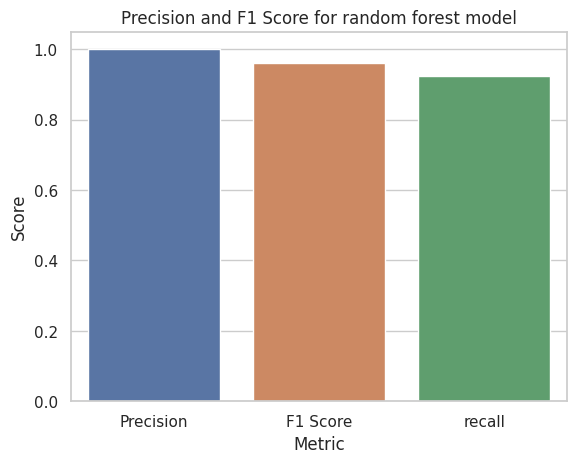

In [ ]:
##model-4
import seaborn as sns



sns.set_theme(style="whitegrid")


precision = precision_score(y_test_re, test_pred_rf)
f1 = f1_score(y_test_re, test_pred_rf)
recall =recall_score(y_test_re, test_pred_rf)


data = {'Metric': ['Precision', 'F1 Score','recall'],
        'Score': [precision, f1,recall]}
df_scores = pd.DataFrame(data)


sns.barplot(x='Metric', y='Score', data=df_scores)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Precision and F1 Score for random forest model')
plt.show()


In [ ]:
##model 5 KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

param_grid_knn = {'n_neighbors':[4,5,6]}

knn_grid = GridSearchCV(knn, param_grid=param_grid_knn, cv=5)


knn_grid.fit(x_train_re,y_train_re)

print(knn_grid.best_params_)

train_pred_rf = knn_grid.predict(x_train_re)
test_pred_rf = knn_grid.predict(x_test_re)
print("recall score",str(recall_score(y_test_re, test_pred_rf)))

print("Train Score: {} ." .format(f1_score(y_train_re, train_pred_rf)))
print("Validation Score: {} ." .format(f1_score(y_test_re, test_pred_rf)))



{'n_neighbors': 4}
recall score 1.0
Train Score: 0.9967213114754099 .
Validation Score: 0.6666666666666666 .


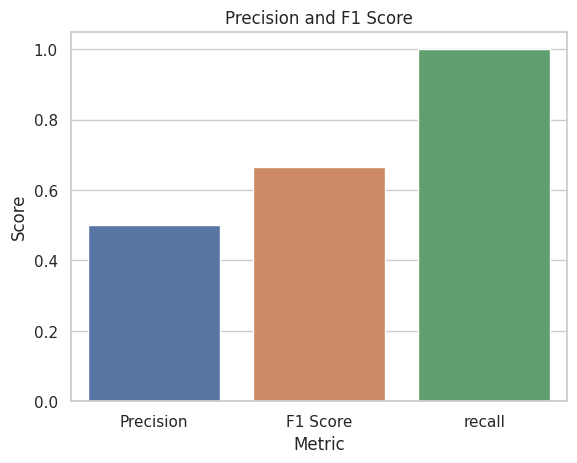

In [ ]:
##model-5
import seaborn as sns



sns.set_theme(style="whitegrid")


precision = precision_score(y_test_re, test_pred_rf)
f1 = f1_score(y_test_re, test_pred_rf)
recall =recall_score(y_test_re, test_pred_rf)


data = {'Metric': ['Precision', 'F1 Score','recall'],
        'Score': [precision, f1,recall]}
df_scores = pd.DataFrame(data)


sns.barplot(x='Metric', y='Score', data=df_scores)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Precision and F1 Score')
plt.show()


# Models using Label Encoding.

In [ ]:
#convert floats into int

for col in ['TotalWorkingHours','Billable_Hours','Hours_off_Duty','Touring_Hours']:
  train_copy[col] = train_copy[col].astype('int')

In [ ]:
#Do the same on the test data 
for col in ['TotalWorkingHours','Billable_Hours','Hours_off_Duty','Touring_Hours']:
  test_copy[col] = test_copy[col].astype('int')

In [ ]:
#on training data

for col in ['Sex','Designation','NoOfProjects','joining_year','joining_month']:
  train_copy[col] = train_copy[col].astype('object')
#on testing data 

for col in ['Sex','Designation','NoOfProjects','joining_year','joining_month']:
  test_copy[col] = test_copy[col].astype('object')

train_copy['Left_Company'] = train_copy['Left_Company'].astype('category')

In [ ]:
del train_copy['Left_Company']

In [ ]:
import matplotlib.pyplot as plt

### Encoding the data using Label encoder

In [ ]:
#pass the label encoded data to the random forest Model

for x in train_copy.columns:
  if train_copy[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_copy[x].values))
        train_copy[x] = lbl.transform(list(train_copy[x].values))
        

In [ ]:
train_copy.head()

,Job_History,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,joining_year,joining_month,job_count
0,156,2,1,205,189,72,189,3,231,8,0,3
1,217,4,0,241,233,120,186,2,147,3,1,4
2,129,3,1,278,264,40,264,3,308,8,11,2
3,28,3,1,345,233,64,0,2,217,9,0,3
4,34,3,1,270,249,88,213,2,231,8,11,1


In [ ]:
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(train_copy, y, test_size= 0.3, random_state=12, stratify= y)

In [ ]:
test_copy.head()

,Job_History,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,joining_year,joining_month,job_count
0,"Worked at Company - 510 , Company - 658 , Comp...",Senior,0,278,263,90,2,2,203,2012,01,4
1,"Worked at Company - 42 , Company - 432 , Compa...",VP,1,273,256,72,176,3,182,2012,02,3
2,"Worked at Company - 99 , Company - 88 , Compan...",EVP,1,275,179,48,176,3,154,2012,02,3
3,"Worked at Company - 554 , Company - 304",EVP,1,238,215,40,160,3,238,2012,04,2
4,"Worked at Company - 548 , Company - 405",VP,1,293,228,88,228,4,315,2006,09,2


### The training data is insufficient & it is underfitting when building the models. 


### The target labelled data is class imbalanced & should perform SMOTE method to over sample the data, It may be helpful in building the model without underfitting. 

### Feature Engineering can be done by using the Job_History column by counting the no of companies he worked earlier & make better predictions. 

# Deep Learning Techniques : 

In [ ]:
#importing packages 
from sklearnex import patch_sklearn
patch_sklearn()
import tensorflow as tf 
import keras
from keras import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import Activation

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# chceking the splitted data 
print(x_train_re.shape)
print(x_test_re.shape)
print(y_train_re.shape)
print(y_test_re.shape)


(304, 283)
(132, 283)
(304,)
(132,)


In [ ]:
#chcecking the label encoded  data 

print(x_train_l.shape)
print(x_test_l.shape)
print(y_train_l.shape) 
print(y_test_l.shape)

(171, 12)
(74, 12)
(171,)
(74,)


In [ ]:
x_train_l.dtypes

Job_History          int64
Designation          int64
Sex                  int64
TotalWorkingHours    int64
Billable_Hours       int64
Hours_off_Duty       int64
Touring_Hours        int64
NoOfProjects         int64
ActualTimeSpent      int64
joining_year         int64
joining_month        int64
job_count            int64
dtype: object

In [ ]:
model = Sequential()

#layer-1
model.add(Dense(6,kernel_initializer='glorot_uniform', input_dim=283))
# model.add(BatchNormalization())
model.add(Activation('relu'))

#layer -2 

model.add(Dense(6, kernel_initializer='glorot_uniform', activation='relu'))
model.add(BatchNormalization())

#layer-3 -Output layer 

model.add(Dense(1, activation='softmax', kernel_initializer='glorot_normal'))

#compiling the model 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [544]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

model = Sequential()

# Layer 1
model.add(Dense(128, kernel_initializer='he_uniform', input_dim=283))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Adjusted dropout rate

# Layer 2
model.add(Dense(64, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Adjusted dropout rate

# Layer 3
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Adjusted dropout rate

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [545]:
model_1 = model.fit(std_x, y, epochs=100, batch_size=22, validation_split=0.1)

Epoch 1/100
10/10 [==============================] - 3s 40ms/step - loss: 0.9923 - accuracy: 0.5000 - val_loss: 1.0114 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9671 - accuracy: 0.4955 - val_loss: 0.9647 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8836 - accuracy: 0.5318 - val_loss: 0.8802 - val_accuracy: 0.4400
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7496 - accuracy: 0.6045 - val_loss: 0.8109 - val_accuracy: 0.5200
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7052 - accuracy: 0.6227 - val_loss: 0.7506 - val_accuracy: 0.6400
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6318 - accuracy: 0.6773 - val_loss: 0.6976 - val_accuracy: 0.7200
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5761 - accuracy: 0.7136 - val_loss: 0.6556 - val_accuracy: 0.7200
Epoch 8/100


Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0235 - accuracy: 0.9955 - val_loss: 0.3551 - val_accuracy: 0.8400
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0307 - accuracy: 0.9864 - val_loss: 0.3484 - val_accuracy: 0.8400
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9818 - val_loss: 0.3466 - val_accuracy: 0.8400
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.3415 - val_accuracy: 0.8400
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.3352 - val_accuracy: 0.8400
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9955 - val_loss: 0.3619 - val_accuracy: 0.8400
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0237 - accuracy: 0.9955 - val_loss: 0.3765 - val_accuracy: 0.8400
Epoch 8/100

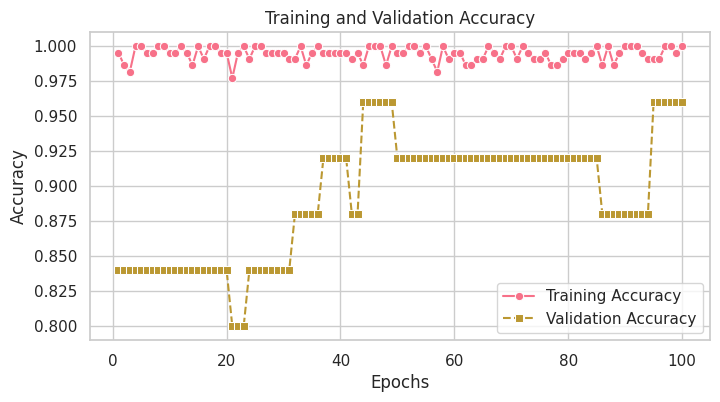

In [546]:

import seaborn as sns
import matplotlib.pyplot as plt

# Train the model and obtain accuracy values
model_1 = model.fit(std_x, y, epochs=100, batch_size=22, validation_split=0.1)
train_accuracy = model_1.history['accuracy']
validation_accuracy = model_1.history['val_accuracy']

# Create a range of epochs for the x-axis
epochs = range(1, len(train_accuracy) + 1)

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Plot the accuracy graph using Seaborn
plt.figure(figsize=(8, 4))
sns.lineplot(x=epochs, y=train_accuracy, label='Training Accuracy', linestyle='-', marker='o')
sns.lineplot(x=epochs, y=validation_accuracy, label='Validation Accuracy', linestyle='--', marker='s')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



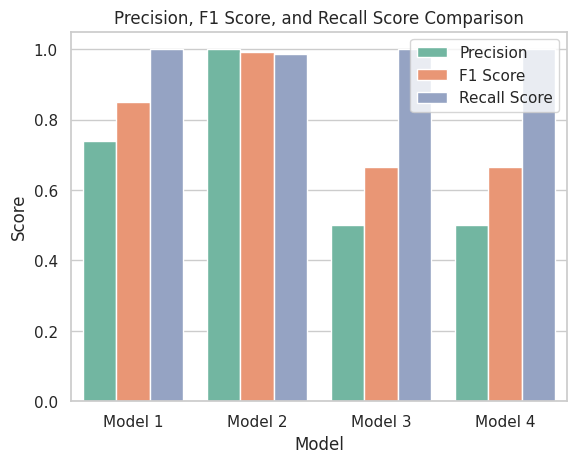

In [542]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Define the models and their corresponding scores
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
precision_scores = [precision_score(train_pred_gb, y),
                    precision_score(y_train_re, train_pred), precision_score(y_test_re, test_pred_rf),
                    precision_score(y_test_re, test_pred_rf)]
f1_scores = [f1_score(train_pred_gb, y),
             f1_score(y_train_re, train_pred), f1_score(y_test_re, test_pred_rf),
             f1_score(y_test_re, test_pred_rf)]

recall_scores = [recall_score(train_pred_gb, y),
                 recall_score(y_train_re, train_pred), recall_score(y_test_re, test_pred_rf),
                 recall_score(y_test_re, test_pred_rf)]

# Create a DataFrame for the scores
data = {'Model': models, 'Precision': precision_scores, 'F1 Score': f1_scores, 'Recall Score': recall_scores}
df_scores = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melt = df_scores.melt('Model', var_name='Metric', value_name='Score')

# Plot bar chart using Seaborn
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='Set2')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Precision, F1 Score, and Recall Score Comparison')
plt.legend(loc='best')
plt.show()


Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9600
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0109 - accuracy: 0.9955 - val_loss: 0.1204 - val_accuracy: 0.9600
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1227 - val_accuracy: 0.9600
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9600
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1266 - val_accuracy: 0.9600
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1290 - val_accuracy: 0.9600
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1362 - val_accuracy: 0.9600
Epoch 8/

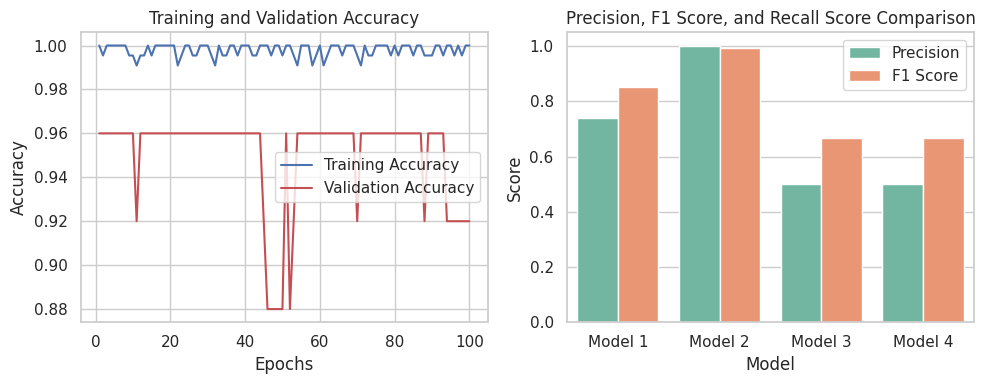

In [547]:
import matplotlib.pyplot as plt
import seaborn as sns


model_1 = model.fit(std_x, y, epochs=100, batch_size=22, validation_split=0.1)
train_accuracy = model_1.history['accuracy']
validation_accuracy = model_1.history['val_accuracy']


epochs = range(1, len(train_accuracy) + 1)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Define the models and their corresponding scores
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
precision_scores = [precision_score(train_pred_gb, y),
                    precision_score(y_train_re, train_pred), precision_score(y_test_re, test_pred_rf),
                    precision_score(y_test_re, test_pred_rf)]
f1_scores = [f1_score(train_pred_gb, y),
             f1_score(y_train_re, train_pred), f1_score(y_test_re, test_pred_rf),
             f1_score(y_test_re, test_pred_rf)]


# Create a DataFrame for the scores
data = {'Model': models, 'Precision': precision_scores, 'F1 Score': f1_scores}
df_scores = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melt = df_scores.melt('Model', var_name='Metric', value_name='Score')

plt.subplot(1, 2, 2)
# Plot bar chart using Seaborn
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='Set2')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Precision, F1 Score, and Recall Score Comparison')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


## *** Tier 2 successfully completed***